# Data Setup

In [ ]:
! pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=99358630c28616cecf5d2781afd4929c4c1f4b2550db9f693299e31e8d498ff9
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
# import pingouin as pg

In [ ]:
# df = pd.read_csv("../content/drive/MyDrive/Adelaide_Data.csv")

df = pd.read_csv("/content/drive/MyDrive/WECs_DataSet/Adelaide_Data.csv")


In [ ]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,_power_fall
0,316.5855,223.9277,182.3434,551.5497,7.8641,243.1339,361.0877,115.9284,78.6087,468.3799,...,82322.0277,98069.1011,86578.6330,93016.4133,63145.1829,98353.1952,80225.1390,98447.2846,97570.2225,1370374.145
1,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,83920.1033,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765
2,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,97358.7395,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511
3,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,0.0000,0.0000,...,80399.3841,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375
4,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,97088.1761,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577


# **Basic Visualisation**
Here we look at some arrangements of bouy's to get an insight into the kind of data we are dealing with.

In [ ]:
class LeastSquareEstimator:
  """using closed form solution for this one may be expensive"""

  def __init__(self,X: np.ndarray,y: np.ndarray):
    if len(X.shape) == 1:
      X = np.concatenate([X[:,None],np.ones((X.shape[0],1))],axis=1)
    else:
      X = np.concatenate([X,np.ones((X.shape[0],1))],axis=1)
    self.beta = (np.linalg.inv(X.T @ X) @ X.T) @ y

  def predict(self,X: np.ndarray):
    if len(X.shape) == 1:
      X = np.concatenate([X[:,None],np.ones((X.shape[0],1))],axis=1)
    else:
      X = np.concatenate([X,np.ones((X.shape[0],1))],axis=1)
    return X @ self.beta

  def get_beta(self):
    return self.beta
  def check(self):
    return


<ipython-input-7-4fc3ac078f8d>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = np.concatenate([X[:,None],np.ones((X.shape[0],1))],axis=1)


-0.9183860690761798


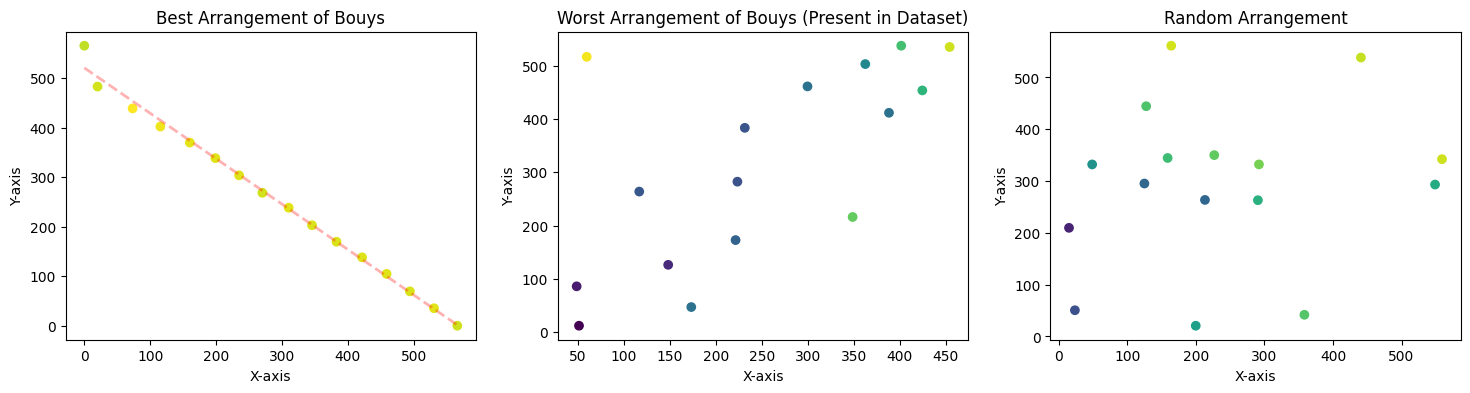

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,4))
best_conf = plt.subplot(1,3,1)
worst_conf = plt.subplot(1,3,2)
random_conf = plt.subplot(1,3,3)
best_conf.set_title("Best Arrangement of Bouys")
worst_conf.set_title("Worst Arrangement of Bouys (Present in Dataset)")
random_conf.set_title("Random Arrangement")

best_conf.set_xlabel("X-axis")
random_conf.set_xlabel("X-axis")
worst_conf.set_xlabel("X-axis")

best_conf.set_ylabel("Y-axis")
random_conf.set_ylabel("Y-axis")
worst_conf.set_ylabel("Y-axis")

#index = np.argsort(df["_power_fall"]).tolist()
index = np.argsort(df["_power_fall"]).tolist()
x_best = df.iloc[index[-1]][0:16]
y_best = df.iloc[index[-1]][16:32]
p_best = df.iloc[index[-1]][32:48]

x_worst = df.iloc[index[0]][0:16]
y_worst = df.iloc[index[0]][16:32]
p_worst = df.iloc[index[0]][32:48]

x_r = df.iloc[index[3500]][0:16]
y_r = df.iloc[index[3500]][16:32]
p_r = df.iloc[index[3500]][32:48]

v_min = np.min(np.array([p_best,p_worst,p_r]))
v_max = np.max(np.array([p_best,p_worst,p_r]))

best_conf.scatter(x_best,y_best,c=p_best,vmin = v_min,vmax= v_max)
worst_conf.scatter(x_worst,y_worst,c=p_worst,vmin = v_min,vmax= v_max)
random_conf.scatter(x_r,y_r,c=p_r,vmin = v_min,vmax= v_max)
m = LeastSquareEstimator(x_best,y_best).get_beta()
# print(m)
best_conf.plot(np.linspace(0,566),m[0] * np.linspace(0,566) + m[1],alpha=0.3,color="red",linewidth=2,linestyle='--',label="reg line")
# worst_conf.plot(np.linspace(0,566),(-1/m[0]) * np.linspace(0,566),alpha=0.3,color="blue",linewidth=4,linestyle=':',label="reg line")
# best_conf.plot([0,0.81775851*500],[0,500],alpha=0.5)
print(m[0])
plt.show()


We check three configuration for best, worst and a random power output. And note the following results.
1. best fit occurs in a line and power output of all the bouys seems maximum
2. perpendicular to best fit line we see the near worst alignment
3. in the worst alignment and random alignment the power output tends to decrease down the perpendicular.
4. bouys having more bouys in front of it (w.r.t perpendicular) have less power output.
5. in worst fit, point at x=67, y=512 is unusualy bright voilating 3rd point.

From this we draw the following inference and then proceed to test our claims
1. the power output favors a certain linear direction of alignment (point 1, 2). this might be because the best fit lies perpendicular to wave direction so there are no bouys in front of any other  bouy (point 3).
2. power is dependent on the number of bouys in front of a certain bouy, the angle of deviation from of each bouy at front from a certain bouy and their distance. We claim this on basis of (point 4,5) also for the natural fact that wave when passed through a bouy will lose some of its energy.


# **Test independence of power output and linear direction of alignment**
the first inference, the power output favors a certain linear direction of alignment.

**Null Hypothesis**: *there is no correlation between power and direction of alignment*

**Alternate hypothesis**: *There is a relation between power and direction of alignment*

To test our hypothesis we have used T-test and ANOVA along with the Pearson's correlation test.

We reject the null hypothesis with a power of 1. We get the pearson's coefficient of -0.84 showing a strong negative correlation.

To validate our tests, we created a heatmap from our dataset of Power output vs Angle of regression line.


In [ ]:
a_p_df = {
    "angle": [],
    "power": [],
}

for index,r in df.iterrows():
    # if(index > 10000):
    #   break
    x = r[:16]
    y = r[16:32]
    p = r[48]
    m,_ = LeastSquareEstimator(x.to_numpy(),y.to_numpy()).get_beta()
    a_p_df["angle"].append(m)
    a_p_df["power"].append(p)

ap_df = pd.DataFrame(a_p_df)
del a_p_df

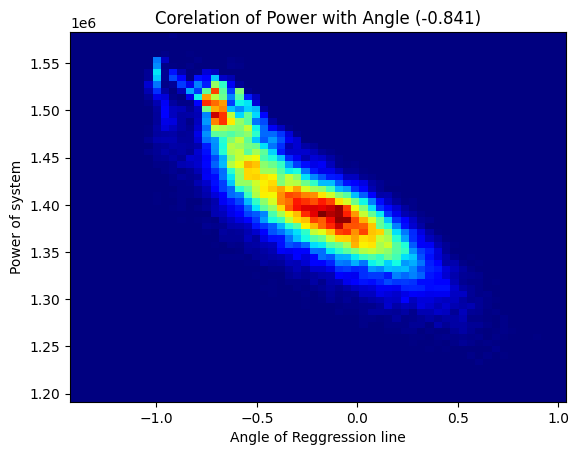

Correlation Coefficient: -0.8417987989190882


In [ ]:
plt.hist2d((ap_df["angle"]),ap_df["power"],bins=60,cmap=plt.cm.jet)
plt.xlabel("Angle of Reggression line")
plt.ylabel("Power of system")
plt.title("Corelation of Power with Angle (-0.841)")
plt.show()
print("Correlation Coefficient:",np.corrcoef(ap_df["angle"],ap_df["power"])[0,1])

In [ ]:
pg.ttest(ap_df["angle"],ap_df["power"])

/usr/local/lib/python3.10/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-6755.542045,143996,two-sided,0.0,"[-1410482.11, -1409663.9]",35.60508,inf,1.0


In [ ]:
pg.corr(ap_df["angle"],ap_df["power"])

,n,r,CI95%,p-val,BF10,power
pearson,71999,-0.841799,"[-0.84, -0.84]",0.0,inf,1.0


This is an attempt to visually show our point, the between the angle of alignment line and the power are highly negatively corelated with corelation coeficient of -0.84. For other cities it ranges from -0.72 to -0.84.

# **Angle of deviation to power correlation.**

(Test that angle of deviation of other bouys wrt wave angle is related to power output).

we take angle of wave = (1,0.94) which is perpendicular to the alignment of max-power arangement.

To do this experiment firstly we create a new dataset with feature column as the angle of deviation from the wave direction

We do this experiment in two parts, each with same hypo testing and visual evidience.

1. Firstly we do this with just frequency of bouys belonging  to a perticular deviation segment.
2. Secondly we weight each of the bouy with inverse of their distance.

Our Hypothesis is as follows.

**Null Hypothesis:** *there is no relation of power with angle of deviation (and distance)*

**Alternate Hypothesis:** *there is a relation of power with angle of deviation (and distance)*

To test our hypothesis we again use the T-test and Pearson's correlation test.

We reject the null hypothesis with a power of 1. We get the pearson's coefficient of 0.84 and 0.95 for both the parts respectively, showing a strong positive correlation in both the cases.

To validate our testing we created the scatter plots of Power output vs the Linear combination of angle deviations.

## Just the frequency
 (it only depends on the angle of deviation)

In [ ]:
a_f_df = {
    "0-10":[],
    "10-20":[],
    "20-30":[],
    "30-40":[],
    "40-50":[],
    "50-60":[],
    "60-70":[],
    "70-80":[],
    "80-90":[],
    "power":[]
}
w_x = 1
w_y = -m
w_n = np.linalg.norm([w_x,w_y])
w_x = w_x/w_n
w_y = w_y/w_n
for index,r in df.iterrows():

    x = r[:16]
    y = r[16:32]
    p = r[32:48].to_numpy()

    # plt.hist2d(x,y,c=p)
    # plt.show()
    for i in range(16):
        alpha = [0]*10
        for j in range(16):
            if(i == j):
                continue
            d_x = x[j] - x[i]
            d_y = y[j] - y[i]
            d_n = np.linalg.norm([d_x,d_y])
            d_x /= d_n
            d_y /= d_n
            dot = w_x*d_x + w_y*d_y
            if(dot >= 0):
                alpha[int(18*np.arccos(dot)/np.pi)] += 1
            # alpha[angle] += 1
        a_f_df[ "0-10"].append(alpha[0])
        a_f_df["10-20"].append(alpha[1])
        a_f_df["20-30"].append(alpha[2])
        a_f_df["30-40"].append(alpha[3])
        a_f_df["40-50"].append(alpha[4])
        a_f_df["50-60"].append(alpha[5])
        a_f_df["60-70"].append(alpha[6])
        a_f_df["70-80"].append(alpha[7])
        a_f_df["80-90"].append(alpha[8])
        a_f_df["power"].append(p[i])
afdf = pd.DataFrame(a_f_df)
del a_f_df


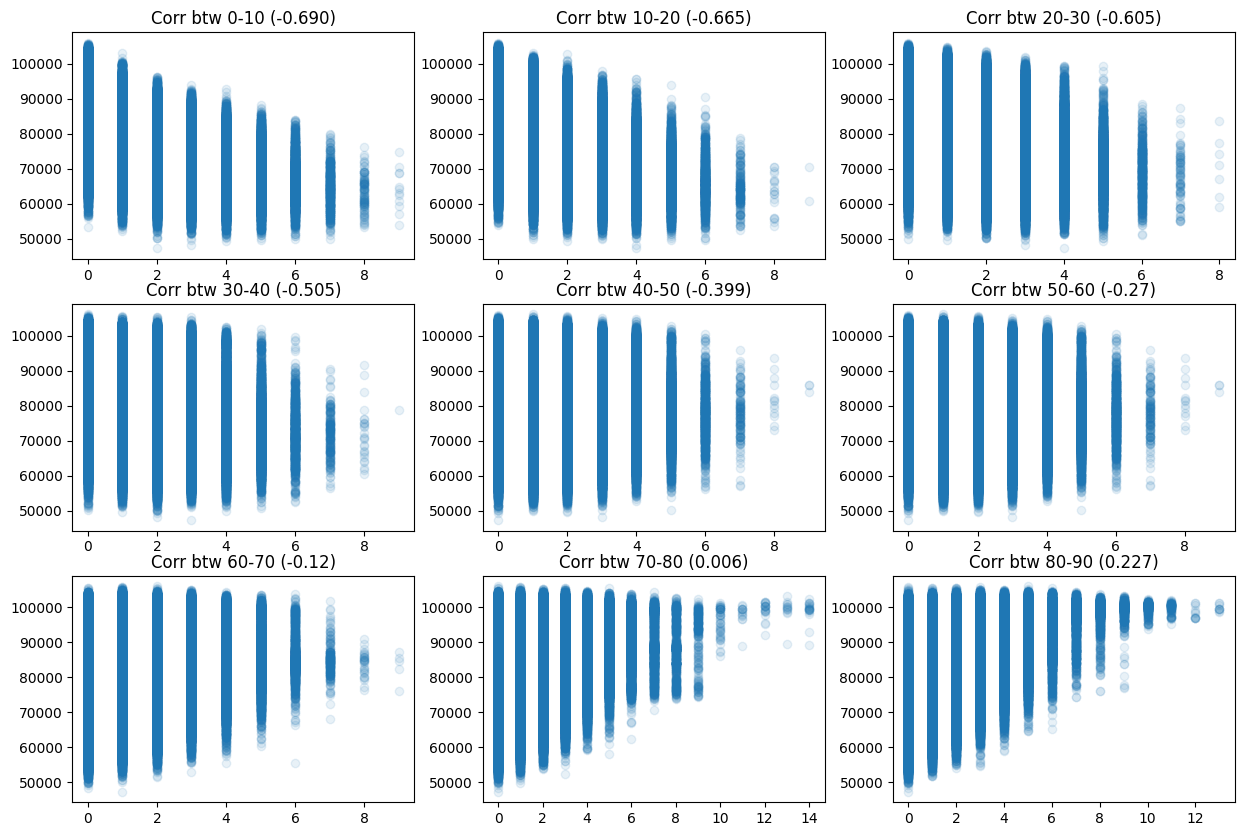

In [ ]:
plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
plt.title("Corr btw 0-10 (-0.690)")
plt.scatter(afdf["0-10"],afdf["power"],alpha=0.1)

plt.subplot(3,3,2)
plt.title("Corr btw 10-20 (-0.665)")
plt.scatter(afdf["10-20"],afdf["power"],alpha=0.1)

plt.subplot(3,3,3)
plt.title("Corr btw 20-30 (-0.605)")
plt.scatter(afdf["20-30"],afdf["power"],alpha=0.1)

plt.subplot(3,3,4)
plt.title("Corr btw 30-40 (-0.505)")
plt.scatter(afdf["30-40"],afdf["power"],alpha=0.1)

plt.subplot(3,3,5)
plt.title("Corr btw 40-50 (-0.399)")
plt.scatter(afdf["40-50"],afdf["power"],alpha=0.1)

plt.subplot(3,3,6)
plt.title("Corr btw 50-60 (-0.27)")
plt.scatter(afdf["40-50"],afdf["power"],alpha=0.1)

plt.subplot(3,3,7)
plt.title("Corr btw 60-70 (-0.12)")
plt.scatter(afdf["60-70"],afdf["power"],alpha=0.1)

plt.subplot(3,3,8)
plt.title("Corr btw 70-80 (0.006)")
plt.scatter(afdf["70-80"],afdf["power"],alpha=0.1)

plt.subplot(3,3,9)
plt.title("Corr btw 80-90 (0.227)")
plt.scatter(afdf["80-90"],afdf["power"],alpha=0.1)
plt.show()


**Inference:**
We check correlation of each bank with power output and see that as the angle of deviation increases the corelation decreases

In [ ]:
print("Cor Coeff of the above graphs:", np.corrcoef(afdf.to_numpy().T)[-1,:-1].tolist())

Cor Coeff of the above graphs: [-0.6904664821096784, -0.665092373670431, -0.6050091798027107, -0.5050395591458144, -0.39965293233066973, -0.27186009537991157, -0.1281070322240148, 0.006052953458548868, 0.2270808704758526]


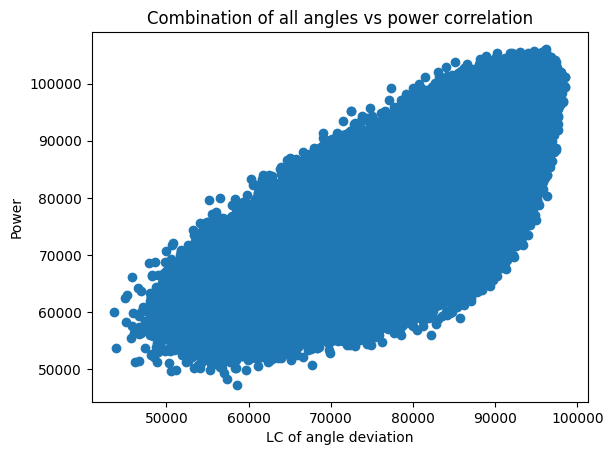

Values used for linear combination [-0.6061882587997616, -0.5919869409643416, -0.4665015683273074, -0.23145950661208492, -0.08997589501355553, 0.008864066056879049, 0.003440719616406894, -0.032483201730856795, 0.04060553990935217]
CorelCoef: 0.8483386202702596
R2 Score 0.7196784146420472


In [ ]:
p = LeastSquareEstimator(afdf.to_numpy()[:,:-1],afdf["power"].to_numpy())
from sklearn.metrics import r2_score
a  = plt.scatter(p.predict(afdf.to_numpy()[:,:-1]),afdf["power"].to_numpy())
plt.title("Combination of all angles vs power correlation")
plt.xlabel("LC of angle deviation")
plt.ylabel("Power")
plt.show()
print("Values used for linear combination",(p.get_beta()[:-1]/np.linalg.norm(p.get_beta()[:-1])).tolist())
print("CorelCoef:",np.corrcoef([p.predict(afdf.to_numpy()[:,:-1]),afdf["power"].to_numpy()])[0,1])
print("R2 Score", r2_score(afdf["power"].to_numpy(),p.predict(afdf.to_numpy()[:,:-1])))

In [ ]:
pg.ttest(p.predict(afdf.to_numpy()[:,:-1]),afdf["power"].to_numpy())

/usr/local/lib/python3.10/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-909.361149,2303966,two-sided,0.0,"[-2236278.6, -2226659.53]",1.198197,inf,1.0


In [ ]:
pg.corr(p.predict(afdf.to_numpy()[:,:-1]),afdf["power"].to_numpy())

,n,r,CI95%,p-val,BF10,power
pearson,1151984,0.844104,"[0.84, 0.84]",0.0,inf,1.0


Here we try to see if linear combination of different angle of deviation would give better results and it does. Here we have taken the most optimal combination through regression for demonstration purposes. evidently it is strongly corelated

## With consideration of distance
(it will also depend on the distance from other bouys in adition to angle deviation)

In [ ]:
a_f_df = {
    "0-10":[],
    "10-20":[],
    "20-30":[],
    "30-40":[],
    "40-50":[],
    "50-60":[],
    "60-70":[],
    "70-80":[],
    "80-90":[],
    "power":[]
}
w_x = 1
w_y = -m
w_n = np.linalg.norm([w_x,w_y])
w_x = w_x/w_n
w_y = w_y/w_n
for index,r in df.iterrows():

    x = r[:16]
    y = r[16:32]
    p = r[32:48].to_numpy()

    # plt.hist2d(x,y,c=p)
    # plt.show()
    for i in range(16):
        alpha = [0]*10
        for j in range(16):
            if(i == j):
                continue
            d_x = x[j] - x[i]
            d_y = y[j] - y[i]
            d_n = np.linalg.norm([d_x,d_y])
            d_x /= d_n
            d_y /= d_n
            dot = w_x*d_x + w_y*d_y
            if(dot >= 0):
                alpha[int(18*np.arccos(dot)/np.pi)] += (1/(np.linalg.norm([x[j]-x[i],y[j]-y[i]])))
            # alpha[angle] += 1
        a_f_df[ "0-10"].append(alpha[0])
        a_f_df["10-20"].append(alpha[1])
        a_f_df["20-30"].append(alpha[2])
        a_f_df["30-40"].append(alpha[3])
        a_f_df["40-50"].append(alpha[4])
        a_f_df["50-60"].append(alpha[5])
        a_f_df["60-70"].append(alpha[6])
        a_f_df["70-80"].append(alpha[7])
        a_f_df["80-90"].append(alpha[8])
        a_f_df["power"].append(p[i])
addf = pd.DataFrame(a_f_df)
del a_f_df



In [ ]:
addf.head(6)

,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,power
0,0.002881,0.012424,0.002706,0.000000,0.002940,0.004567,0.005900,0.021369,0.002534,78738.9831
1,0.004574,0.003196,0.002986,0.000000,0.000000,0.000000,0.000000,0.008030,0.002794,86026.8604
2,0.004554,0.002679,0.021180,0.005844,0.007368,0.011421,0.000000,0.006229,0.000000,69559.8105
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013537,99665.7889
4,0.014716,0.001675,0.002793,0.016357,0.006849,0.000000,0.002098,0.000000,0.000000,74052.5623
5,0.005252,0.000000,0.011285,0.000000,0.000000,0.006703,0.019374,0.007031,0.006478,79484.3263


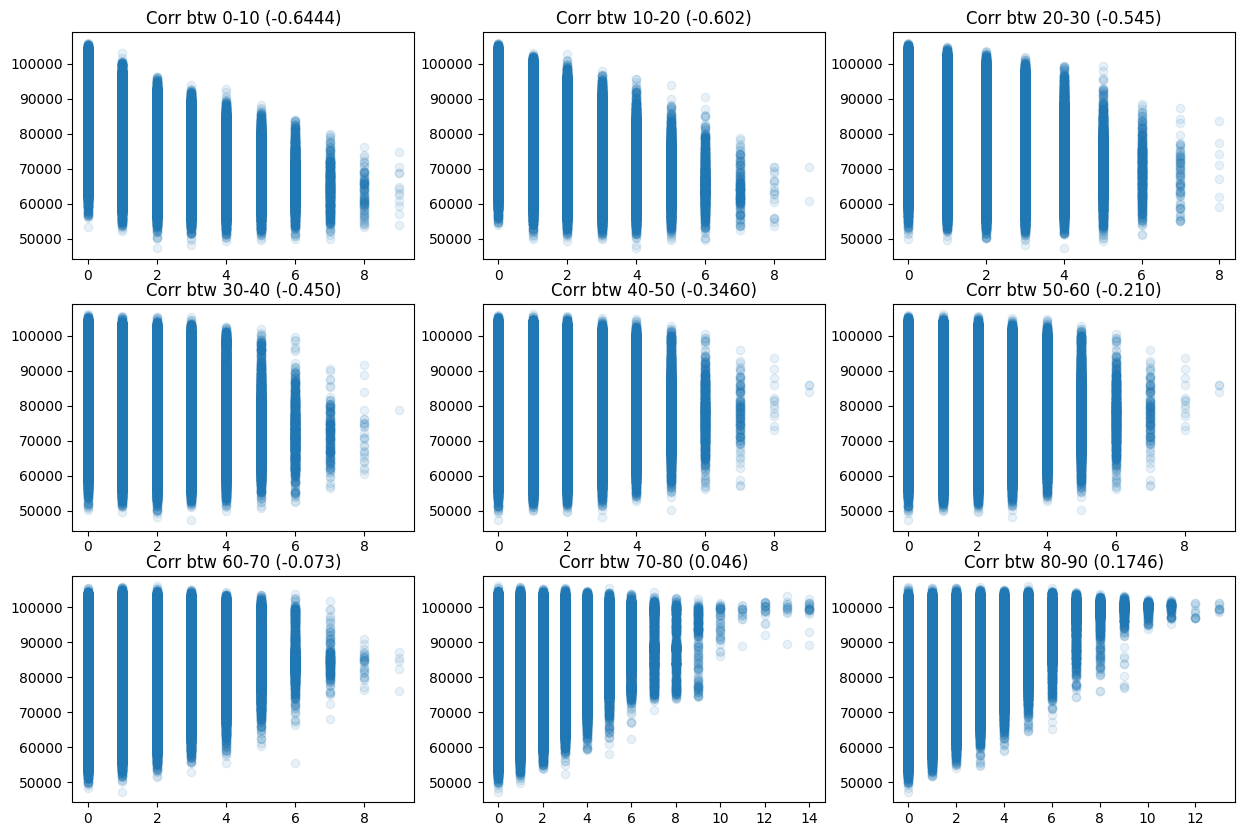

In [ ]:

plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
plt.title("Corr btw 0-10 (-0.6444)")
plt.scatter(afdf["0-10"],addf["power"],alpha=0.1)

plt.subplot(3,3,2)
plt.title("Corr btw 10-20 (-0.602)")
plt.scatter(afdf["10-20"],addf["power"],alpha=0.1)

plt.subplot(3,3,3)
plt.title("Corr btw 20-30 (-0.545)")
plt.scatter(afdf["20-30"],addf["power"],alpha=0.1)

plt.subplot(3,3,4)
plt.title("Corr btw 30-40 (-0.450)")
plt.scatter(afdf["30-40"],addf["power"],alpha=0.1)

plt.subplot(3,3,5)
plt.title("Corr btw 40-50 (-0.3460)")
plt.scatter(afdf["40-50"],addf["power"],alpha=0.1)

plt.subplot(3,3,6)
plt.title("Corr btw 50-60 (-0.210)")
plt.scatter(afdf["40-50"],addf["power"],alpha=0.1)

plt.subplot(3,3,7)
plt.title("Corr btw 60-70 (-0.073)")
plt.scatter(afdf["60-70"],addf["power"],alpha=0.1)

plt.subplot(3,3,8)
plt.title("Corr btw 70-80 (0.046)")
plt.scatter(afdf["70-80"],addf["power"],alpha=0.1)

plt.subplot(3,3,9)
plt.title("Corr btw 80-90 (0.1746)")
plt.scatter(afdf["80-90"],addf["power"],alpha=0.1)
plt.show()


In [ ]:
print(np.corrcoef(addf.to_numpy().T)[-1,:-1])

[-0.64442735 -0.60279211 -0.54576601 -0.45003554 -0.34605209 -0.21067007
 -0.07342594  0.04696963  0.17468341]


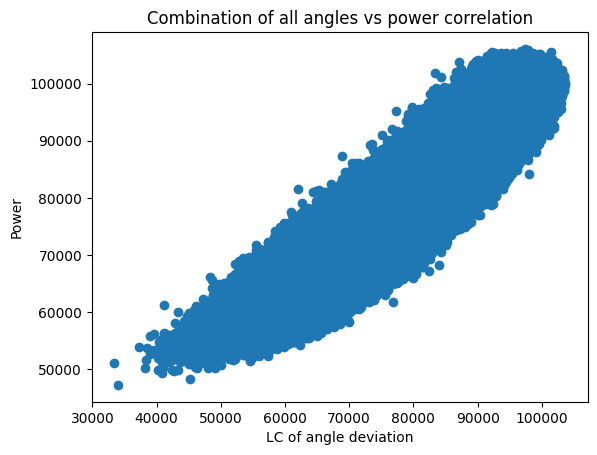

Values used for linear combination [-0.60226782 -0.553698   -0.45077021 -0.29829925 -0.17273185 -0.07964414
 -0.00449562  0.02577235  0.04064322]
CorelCoef: 0.9492993214886775
R2 score: 0.90116920177886


In [ ]:

p = LeastSquareEstimator(addf.to_numpy()[:,:-1],addf["power"].to_numpy())
from sklearn.metrics import r2_score
a  = plt.scatter(p.predict(addf.to_numpy()[:,:-1]),addf["power"].to_numpy())
plt.title("Combination of all angles vs power correlation")
plt.xlabel("LC of angle deviation")
plt.ylabel("Power")
plt.show()
print("Values used for linear combination",(p.get_beta()[:-1]/np.linalg.norm(p.get_beta()[:-1])))
print("CorelCoef:",np.corrcoef([p.predict(addf.to_numpy()[:,:-1]),addf["power"].to_numpy()])[0,1])
print("R2 score:", r2_score(addf["power"].to_numpy(),p.predict(addf.to_numpy()[:,:-1])))

In [ ]:
pg.corr(p.predict(addf.to_numpy()[:,:-1]),addf["power"].to_numpy())

,n,r,CI95%,p-val,BF10,power
pearson,1151984,0.949299,"[0.95, 0.95]",0.0,nan,1.0


**Inference**

It can be seen visualy that inclusion of distance metric increases the corelation of power with angle deviation. hence we are going to use the dataset addf or the angle deviation with distance weight as our dataset for training.
Some other atributes we may join is the wave angle.

# Power Output and Positioning Independence

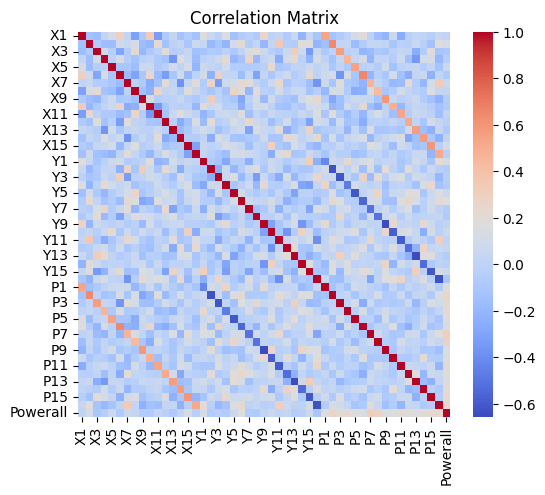

In [ ]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Null Hypothesis: There is no correlation between the position and the power output of the buoys, i.e, they are independent of each other.

Alternate Hypothesis: The power output of the buoys is dependent on its positioning in the farm.

Performed Z-testing for the hypothesis and found a strong correlation between the Coordinates(Position) and power output of the buoys. So we can say that the power output is dependent on the positioning of the buoys.

As seen in the heatmap above, there is a positive correlation between Xi and Pi, while there is a negative correlation between the values of Yi and Pi.

So, we reject the null hypothesis and accept the alternate hypothesis on the basis of our z-testing and validating it using the pearson's coefficient of correlation, as visualized above.

# Misclaneous Test
these are test which were done but didn't reveal much significant information for our problem

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Sydney_Data.csv')
# data = pd.read_csv('/content/drive/MyDrive/WECs_DataSet/Sydney_Data.csv')
column_names = [f'X{i}' for i in range(1, 17)] + [f'Y{i}' for i in range(1, 17)] + [f'P{i}' for i in range(1, 17)] + ['Powerall']
data.columns = column_names

# Check for missing values
# data.isnull().sum()



In [ ]:
# Get summary statistics
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Powerall
count,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,...,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,7.199900e+04
mean,324.133374,318.477362,248.652631,273.801529,364.119683,270.716619,268.092122,251.208070,257.471430,263.834583,...,92460.884080,92400.975646,92359.920807,93528.646327,92532.953265,92866.755979,94515.600559,92124.749321,92812.610497,1.486229e+06
std,201.042089,200.451621,207.727700,202.495956,165.251348,221.883331,210.126467,191.411037,193.920646,203.081690,...,6351.798805,7314.158973,6617.069863,7108.760851,6631.067652,7179.122445,6828.225439,6978.018276,7128.182893,2.308365e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,67649.721100,67935.571500,67961.501700,67930.722800,68171.326100,68113.928900,68294.961800,66233.342800,64609.768500,1.361962e+06
25%,137.455000,131.145850,43.281500,63.622900,248.586900,38.901650,57.463400,79.830000,71.289250,48.943750,...,87871.385400,86957.379300,87504.869750,88247.377750,87321.966400,87602.912550,90045.083400,86835.587700,87872.906700,1.470987e+06
50%,355.491700,355.171500,201.883500,274.830100,388.361200,250.374600,233.010400,213.817000,239.241300,265.394800,...,92484.468800,91374.359800,92113.541800,93441.473900,93066.785000,91552.374600,94274.492400,91202.941700,91453.286100,1.487282e+06
75%,524.002100,518.243450,462.505600,468.287000,515.557000,511.209300,485.903150,422.632000,432.784500,457.985850,...,97638.110300,97719.256750,97502.161300,98653.938950,97534.290600,98739.756650,99668.769550,97512.504000,98362.924200,1.504180e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,110026.753900,109417.620000,109240.703000,109668.448700,109185.088800,109898.206000,109237.388800,109087.161400,109253.606800,1.536347e+06


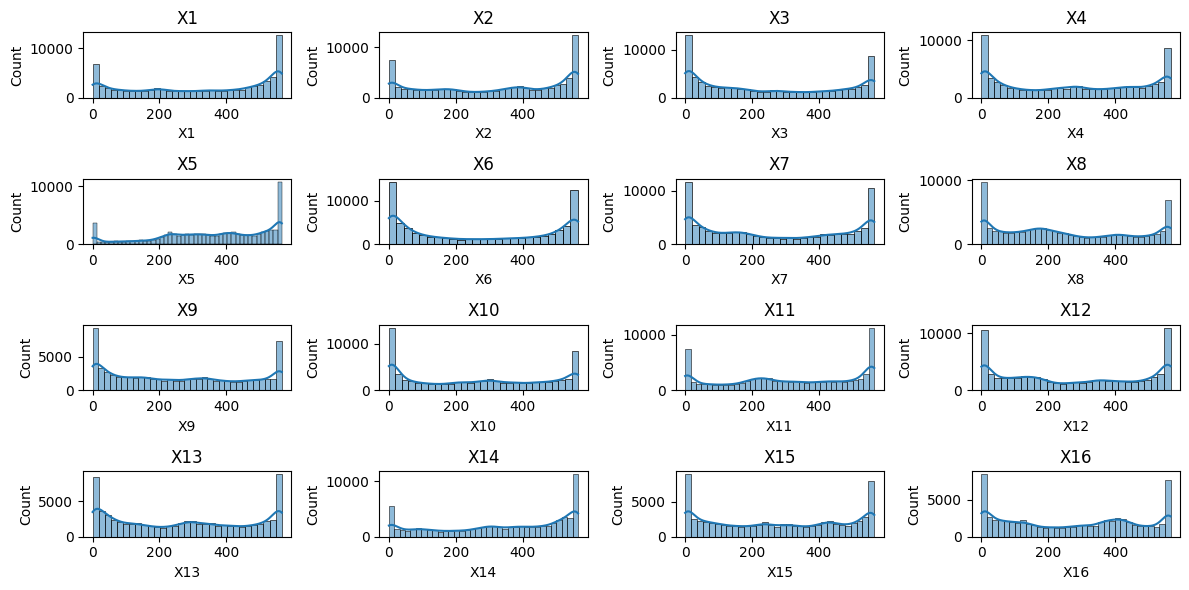

In [ ]:
# Histrograms for univariate tests
plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i+1)
    sns.histplot(data['X'+str(i+1)], kde=True)
    plt.title('X'+str(i+1))
plt.tight_layout()
plt.show()


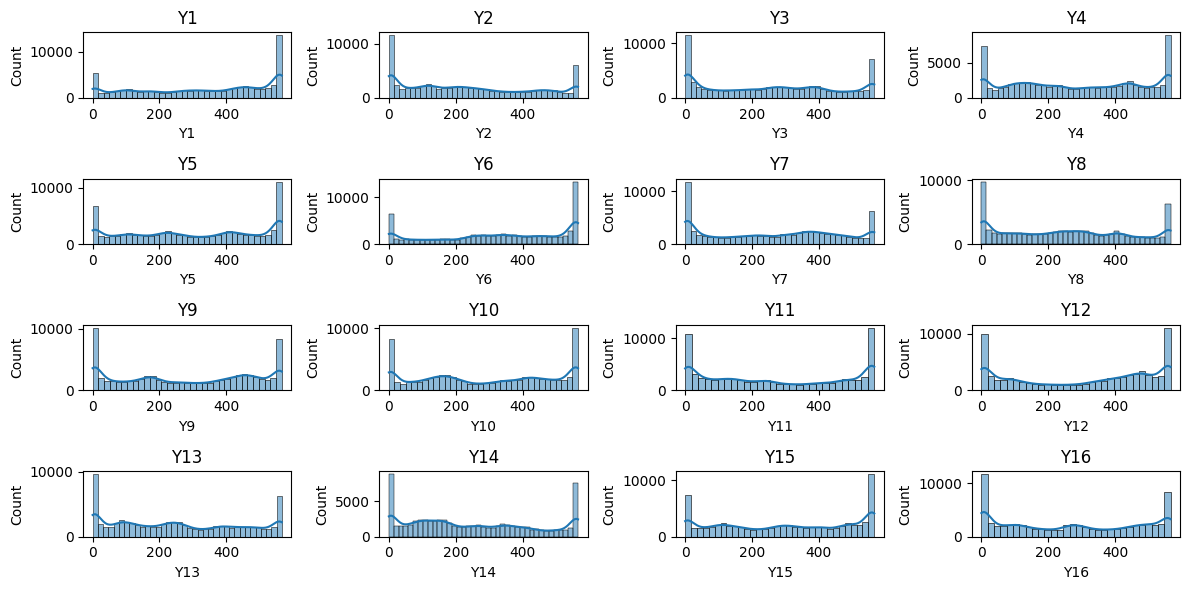

In [ ]:

plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i+1)
    sns.histplot(data['Y'+str(i+1)], kde=True)
    plt.title('Y'+str(i+1))
plt.tight_layout()
plt.show()

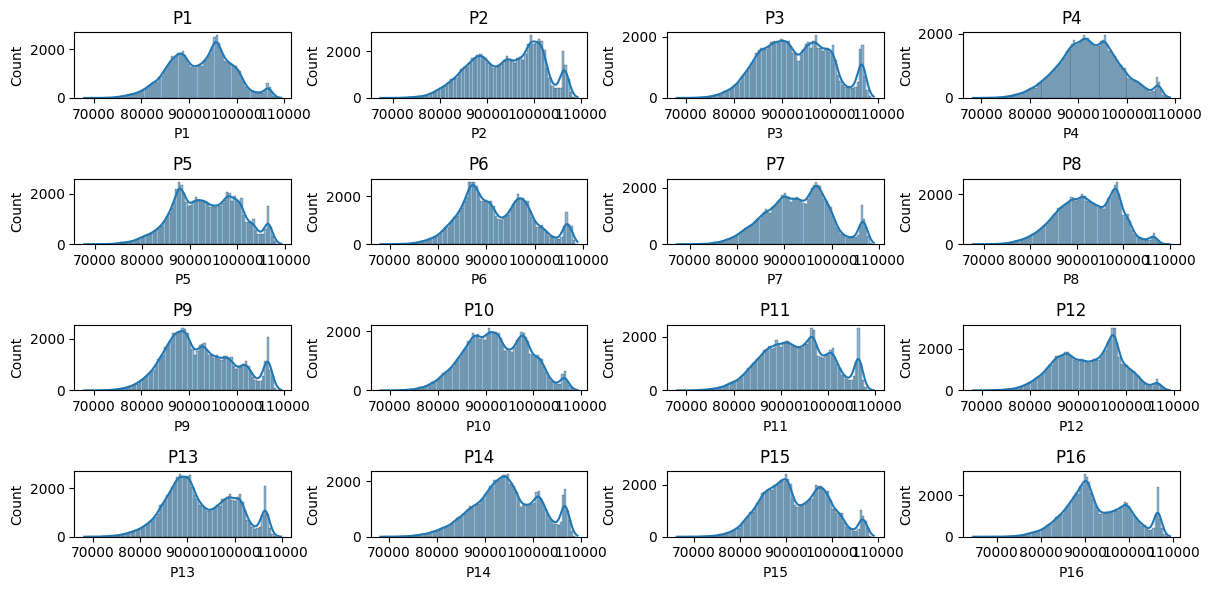

In [ ]:
# Plot histograms for absorbed power
plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i+1)
    sns.histplot(data['P'+str(i+1)], kde=True)
    plt.title('P'+str(i+1))
plt.tight_layout()
plt.show()

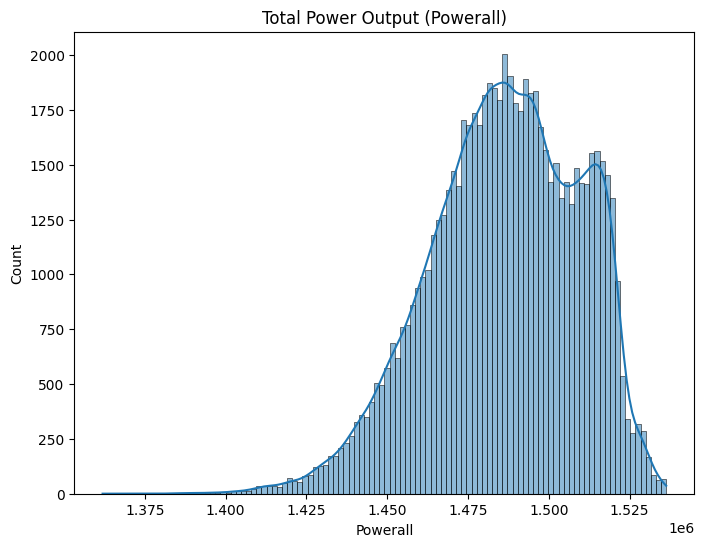

In [ ]:
# Plot histogram for total power output
plt.figure(figsize=(8, 6))
sns.histplot(data['Powerall'], kde=True)
plt.title('Total Power Output (Powerall)')
plt.show()

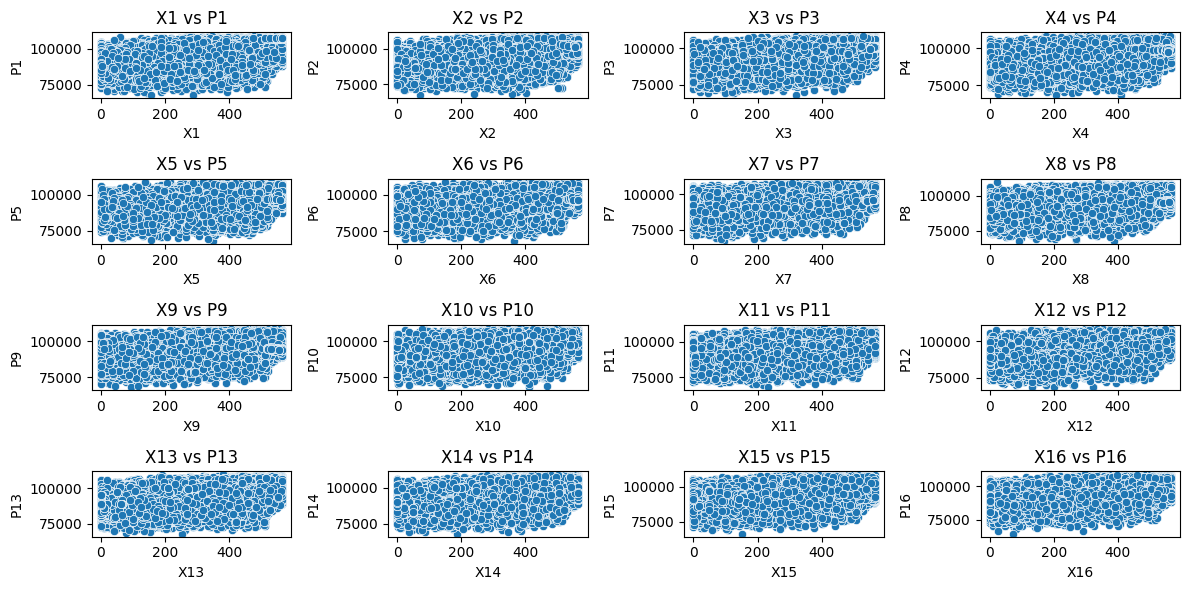

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=data['X'+str(i+1)], y=data['P'+str(i+1)])
    plt.title('X'+str(i+1)+' vs P'+str(i+1))
plt.tight_layout()
plt.show()

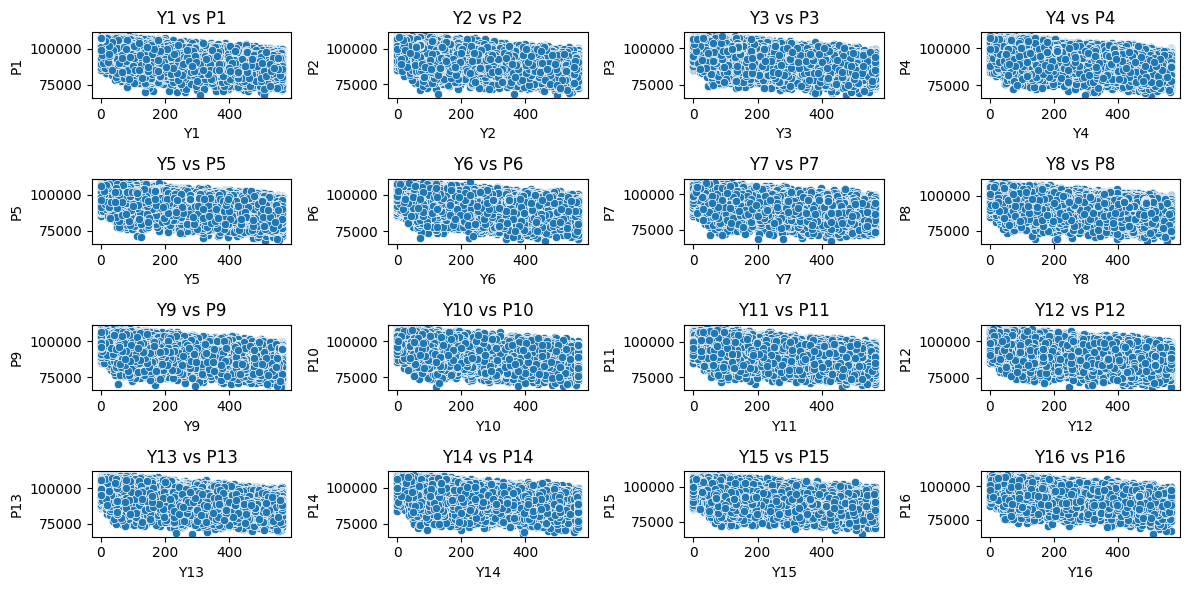

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=data['Y'+str(i+1)], y=data['P'+str(i+1)])
    plt.title('Y'+str(i+1)+' vs P'+str(i+1))
plt.tight_layout()
plt.show()

In [ ]:
# Scatter plots for X and Y positions vs Total Power Output
plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=data['X'+str(i+1)], y=data['Powerall'])
    plt.title('X'+str(i+1)+' vs Powerall')
plt.tight_layout()
plt.show()



In [ ]:
plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=data['Y'+str(i+1)], y=data['Powerall'])
    plt.title('Y'+str(i+1)+' vs Powerall')
plt.tight_layout()
plt.show()

In [ ]:
# Scatter plot for Absorbed Power vs Total Power Output
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Powerall'], y=data[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16']].sum(axis=1))
plt.xlabel('Total Power Output (Powerall)')
plt.ylabel('Total Absorbed Power of WECs')
plt.title('Relationship between Absorbed Power of WECs and Total Power Output')
plt.show()